In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.0/800.0 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

**INSTALLING LIBRARIES**

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

**SETTING UP PRE-TRAINED WEIGHTS**

In [ ]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 6.74M/6.74M [00:00<00:00, 181MB/s]


In [ ]:
#Withut this Colab is giving an error when installing Roboflow
import locale
locale.getpreferredencoding = lambda: "UTF-8"

**LOADING CONTENTS FROM GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# define number of classes based on YAML
import yaml
with open("/content/drive/MyDrive/Tree_Project_New.v1i.yolov8/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

**SAVING LOGS OF RESULTS**

In [ ]:
#Define a project --> Destination directory for all results
project = "/content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results"
#Define subdirectory for this specific training
name = "epochs-" #note that if you run the training again, it creates a directory: 200_epochs-2

**TRAINING THE MODEL**

In [ ]:
# Train the model
results = model.train(data='/content/drive/MyDrive/Tree_Project_New.v1i.yolov8/data.yaml',
                      project=project,
                      name=name,
                      epochs=20,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=800)

Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/Tree_Project_New.v1i.yolov8/data.yaml, epochs=100, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results, name=epochs-3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

100%|██████████| 755k/755k [00:00<00:00, 26.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/train/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100%|██████████| 41/41 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/valid/images/842-image_png.rf.1c5a76130d1b87d247e8ecd80ec0d930.jpg: 2 duplicate labels removed


Plotting labels to /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 0 dataloader workers
Logging results to /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.958      5.146      3.401      1.761         17        800: 100%|██████████| 11/11 [01:52<00:00, 10.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.87s/it]

                   all         11        152     0.0221      0.415      0.174     0.0805     0.0193      0.368      0.158     0.0536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.739      3.567      3.043      1.525         10        800: 100%|██████████| 11/11 [01:33<00:00,  8.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.03s/it]

                   all         11        152     0.0358      0.486      0.209     0.0929     0.0343      0.477        0.2      0.076



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.687      3.239      2.491      1.467          3        800: 100%|██████████| 11/11 [01:32<00:00,  8.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.81s/it]

                   all         11        152     0.0379      0.554       0.26      0.128     0.0368      0.514      0.249      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.605      2.884      2.057      1.368          8        800: 100%|██████████| 11/11 [01:28<00:00,  8.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.94s/it]

                   all         11        152      0.693      0.247      0.468      0.236       0.69      0.244      0.434       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.537      2.782      1.945      1.365         30        800: 100%|██████████| 11/11 [01:29<00:00,  8.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.77s/it]

                   all         11        152      0.666      0.342       0.56      0.267      0.612      0.311      0.474      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.501      2.746      1.935      1.369         32        800: 100%|██████████| 11/11 [01:27<00:00,  7.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.54s/it]

                   all         11        152      0.524      0.383      0.501      0.252      0.523      0.367      0.466      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.573      2.653       1.94       1.37          6        800: 100%|██████████| 11/11 [01:31<00:00,  8.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.03s/it]

                   all         11        152      0.506      0.436      0.441      0.235      0.528       0.42      0.429      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.513      2.578      2.039      1.337          3        800: 100%|██████████| 11/11 [01:26<00:00,  7.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.67s/it]

                   all         11        152      0.476      0.482       0.49      0.264      0.458      0.461      0.463      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.495      2.571      1.748      1.333         37        800: 100%|██████████| 11/11 [01:36<00:00,  8.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.86s/it]

                   all         11        152      0.476      0.482       0.49      0.264      0.458      0.461      0.463      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.532      2.711      1.744      1.364         42        800: 100%|██████████| 11/11 [01:30<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.19s/it]

                   all         11        152      0.538      0.539      0.548      0.315       0.54      0.531      0.527      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.435      2.407      1.686      1.304         23        800: 100%|██████████| 11/11 [01:31<00:00,  8.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.82s/it]

                   all         11        152      0.717      0.464      0.554      0.307      0.678      0.445      0.501      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.524      2.402      1.781      1.343          5        800: 100%|██████████| 11/11 [01:30<00:00,  8.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.45s/it]

                   all         11        152      0.717      0.464      0.554      0.307      0.678      0.445      0.501      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.513      2.684      1.771      1.411         15        800: 100%|██████████| 11/11 [01:30<00:00,  8.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.71s/it]

                   all         11        152      0.647      0.584      0.609      0.379      0.634       0.56      0.571      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.413        2.3      1.733      1.322          8        800: 100%|██████████| 11/11 [01:29<00:00,  8.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.62s/it]

                   all         11        152      0.647      0.603      0.648      0.357      0.666      0.582       0.62      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.436       2.29      1.663      1.334         28        800: 100%|██████████| 11/11 [01:30<00:00,  8.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.80s/it]

                   all         11        152      0.647      0.603      0.648      0.357      0.666      0.582       0.62      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G       1.35      2.299      1.675      1.292          7        800: 100%|██████████| 11/11 [01:30<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.46s/it]

                   all         11        152      0.717      0.614      0.702       0.43      0.705      0.584      0.665      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.413      2.476      1.627      1.283         15        800: 100%|██████████| 11/11 [01:32<00:00,  8.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.16s/it]

                   all         11        152      0.635      0.696      0.699      0.401      0.637      0.665      0.664      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G      1.367      2.225      1.563      1.269         28        800: 100%|██████████| 11/11 [01:31<00:00,  8.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.71s/it]

                   all         11        152      0.687      0.626      0.681      0.403      0.715      0.578      0.636      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.375      2.316      1.549      1.255         45        800: 100%|██████████| 11/11 [01:33<00:00,  8.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.39s/it]

                   all         11        152      0.687      0.626      0.681      0.403      0.715      0.578      0.636      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.338      2.321      1.491      1.247         35        800: 100%|██████████| 11/11 [01:31<00:00,  8.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.59s/it]

                   all         11        152      0.707      0.667      0.716      0.424      0.699       0.56      0.641      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.334      2.236      1.611      1.271          8        800: 100%|██████████| 11/11 [01:31<00:00,  8.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.67s/it]

                   all         11        152      0.733      0.639      0.713      0.447      0.694      0.602      0.665      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G      1.412      2.261      1.654      1.323          7        800: 100%|██████████| 11/11 [01:33<00:00,  8.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.47s/it]

                   all         11        152      0.733      0.639      0.713      0.447      0.694      0.602      0.665      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G      1.313      2.192      1.452      1.245         10        800: 100%|██████████| 11/11 [01:29<00:00,  8.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.61s/it]

                   all         11        152      0.735       0.58      0.699      0.437      0.823      0.515      0.656      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.282      2.172      1.457      1.211         21        800: 100%|██████████| 11/11 [01:33<00:00,  8.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.97s/it]

                   all         11        152      0.748      0.578      0.688       0.43      0.706      0.545      0.651      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.298      2.176       1.51      1.225         30        800: 100%|██████████| 11/11 [01:30<00:00,  8.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.73s/it]

                   all         11        152      0.748      0.578      0.688       0.43      0.706      0.545      0.651      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G       1.25      2.051      1.416      1.211         23        800: 100%|██████████| 11/11 [01:31<00:00,  8.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.22s/it]

                   all         11        152      0.704      0.673      0.728       0.47      0.725      0.611      0.716      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.278      2.037      1.395      1.224         19        800: 100%|██████████| 11/11 [01:31<00:00,  8.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.37s/it]

                   all         11        152      0.724       0.69      0.757      0.474      0.704      0.683      0.736      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.275      2.132      1.324      1.217         12        800: 100%|██████████| 11/11 [01:32<00:00,  8.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.84s/it]

                   all         11        152      0.724       0.69      0.757      0.474      0.704      0.683      0.736      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.218       2.02      1.321      1.185         14        800: 100%|██████████| 11/11 [01:32<00:00,  8.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.37s/it]

                   all         11        152      0.702        0.7      0.714      0.452      0.694      0.699       0.72      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G       1.22      1.961      1.346      1.184         15        800: 100%|██████████| 11/11 [01:29<00:00,  8.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.87s/it]

                   all         11        152      0.741      0.626        0.7      0.439      0.728      0.619      0.698      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.207      2.072      1.348      1.187         10        800: 100%|██████████| 11/11 [01:31<00:00,  8.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.11s/it]

                   all         11        152      0.741      0.626        0.7      0.439      0.728      0.619      0.698      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G       1.25      2.139      1.361      1.194         27        800: 100%|██████████| 11/11 [01:35<00:00,  8.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.99s/it]

                   all         11        152      0.628      0.693      0.737      0.438      0.662      0.608        0.7      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.208      2.078      1.395      1.178         30        800: 100%|██████████| 11/11 [01:29<00:00,  8.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.82s/it]

                   all         11        152      0.694      0.661      0.749      0.482      0.732      0.648      0.735       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.187      1.906      1.316      1.189         11        800: 100%|██████████| 11/11 [01:29<00:00,  8.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.15s/it]

                   all         11        152      0.727      0.644      0.757      0.499      0.854      0.566      0.733      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.189      2.011      1.374      1.176         31        800: 100%|██████████| 11/11 [01:31<00:00,  8.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.84s/it]

                   all         11        152      0.727      0.644      0.757      0.499      0.854      0.566      0.733      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.153      1.989      1.411      1.171          7        800: 100%|██████████| 11/11 [01:31<00:00,  8.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.04s/it]

                   all         11        152      0.768      0.657      0.752      0.469        0.8        0.6      0.727       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.213        2.1      1.266      1.169         24        800: 100%|██████████| 11/11 [01:33<00:00,  8.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:14<00:00,  7.28s/it]

                   all         11        152      0.708      0.689       0.74      0.481      0.868      0.584      0.719      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.147      1.892      1.256      1.154         20        800: 100%|██████████| 11/11 [01:30<00:00,  8.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.65s/it]

                   all         11        152      0.708      0.689       0.74      0.481      0.868      0.584      0.719      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G       1.18      1.987      1.297      1.206          8        800: 100%|██████████| 11/11 [01:30<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.08s/it]

                   all         11        152      0.823        0.6      0.729      0.474       0.84      0.612      0.727      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.138      1.903       1.24      1.169         29        800: 100%|██████████| 11/11 [01:30<00:00,  8.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.77s/it]

                   all         11        152      0.733      0.645      0.738       0.48      0.761      0.592      0.707      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.139      1.897      1.326       1.17          9        800: 100%|██████████| 11/11 [01:28<00:00,  8.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.44s/it]

                   all         11        152      0.733      0.645      0.738       0.48      0.761      0.592      0.707      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.142      1.824      1.219      1.175         12        800: 100%|██████████| 11/11 [01:29<00:00,  8.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.71s/it]

                   all         11        152      0.745      0.618      0.735      0.496      0.734      0.608      0.711      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.151      1.809      1.281      1.158         22        800: 100%|██████████| 11/11 [01:29<00:00,  8.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.28s/it]

                   all         11        152      0.741      0.664      0.744      0.498      0.793      0.556      0.704      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      1.054      1.798      1.185      1.144          9        800: 100%|██████████| 11/11 [01:28<00:00,  8.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.51s/it]

                   all         11        152      0.741      0.664      0.744      0.498      0.793      0.556      0.704      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.9962      1.775      1.124      1.083          9        800: 100%|██████████| 11/11 [01:31<00:00,  8.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.01s/it]

                   all         11        152      0.761      0.654      0.752      0.499      0.735      0.627      0.722      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.075      1.803      1.215      1.141          8        800: 100%|██████████| 11/11 [01:29<00:00,  8.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.77s/it]

                   all         11        152      0.737      0.696      0.763      0.507       0.76      0.619      0.726      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.036      1.793      1.114       1.09         26        800: 100%|██████████| 11/11 [01:28<00:00,  8.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.48s/it]

                   all         11        152      0.737      0.696      0.763      0.507       0.76      0.619      0.726      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      1.077      1.758      1.166      1.127         31        800: 100%|██████████| 11/11 [01:31<00:00,  8.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.58s/it]

                   all         11        152      0.827      0.667      0.754      0.511      0.811      0.655      0.733      0.431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      1.094      1.854      1.176      1.137         30        800: 100%|██████████| 11/11 [01:29<00:00,  8.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.10s/it]

                   all         11        152      0.809      0.673       0.76      0.516      0.774      0.644      0.722      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.038      1.778      1.118      1.098         15        800: 100%|██████████| 11/11 [01:32<00:00,  8.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.57s/it]

                   all         11        152      0.785      0.673      0.757      0.527      0.778      0.668      0.734      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.044      1.641      1.199      1.111          4        800: 100%|██████████| 11/11 [01:30<00:00,  8.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.01s/it]

                   all         11        152      0.785      0.673      0.757      0.527      0.778      0.668      0.734      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.069      1.877      1.193       1.12         11        800: 100%|██████████| 11/11 [01:30<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.86s/it]

                   all         11        152      0.726      0.657      0.757      0.522      0.711      0.644      0.725      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G       1.02        1.7      1.096       1.08         35        800: 100%|██████████| 11/11 [01:30<00:00,  8.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.26s/it]

                   all         11        152      0.705       0.68       0.75      0.503      0.676       0.65      0.716      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      1.086      1.937      1.227      1.156          8        800: 100%|██████████| 11/11 [01:28<00:00,  8.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.72s/it]

                   all         11        152      0.705       0.68       0.75      0.503      0.676       0.65      0.716      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G       1.02      1.755      1.138      1.099         18        800: 100%|██████████| 11/11 [01:30<00:00,  8.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.95s/it]

                   all         11        152      0.728      0.677      0.753      0.504      0.677      0.669      0.717      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.9846      1.749      1.159      1.083         10        800: 100%|██████████| 11/11 [01:30<00:00,  8.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.55s/it]

                   all         11        152      0.718      0.682      0.744      0.515      0.685       0.65      0.704      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.9978      1.864      1.173        1.1         15        800: 100%|██████████| 11/11 [01:27<00:00,  7.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.35s/it]

                   all         11        152      0.718      0.682      0.744      0.515      0.685       0.65      0.704      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      1.051      1.856      1.156      1.118         11        800: 100%|██████████| 11/11 [01:31<00:00,  8.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.65s/it]

                   all         11        152      0.681      0.708      0.742      0.505       0.65      0.668      0.712      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G      1.021      1.709      1.154      1.106         21        800: 100%|██████████| 11/11 [01:30<00:00,  8.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.95s/it]

                   all         11        152      0.852      0.628      0.758      0.497      0.869      0.591      0.726      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.9699      1.537      1.091      1.082         22        800: 100%|██████████| 11/11 [01:30<00:00,  8.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.70s/it]

                   all         11        152      0.852      0.628      0.758      0.497      0.869      0.591      0.726      0.416



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.9794      1.745       1.13      1.065         15        800: 100%|██████████| 11/11 [01:32<00:00,  8.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.92s/it]

                   all         11        152        0.8      0.642      0.754      0.504       0.77      0.636      0.734       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      1.016      1.592      1.031      1.071         21        800: 100%|██████████| 11/11 [01:30<00:00,  8.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.72s/it]

                   all         11        152      0.805      0.635      0.756        0.5      0.877      0.578      0.726      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.9893      1.699      1.099      1.109          7        800: 100%|██████████| 11/11 [01:33<00:00,  8.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.54s/it]

                   all         11        152      0.805      0.635      0.756        0.5      0.877      0.578      0.726      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G      1.007      1.661      1.022      1.085         21        800: 100%|██████████| 11/11 [01:36<00:00,  8.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.81s/it]

                   all         11        152      0.799      0.624      0.744      0.504      0.786      0.605      0.727      0.406



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G       0.98      1.693     0.9975       1.05         25        800: 100%|██████████| 11/11 [01:32<00:00,  8.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.77s/it]

                   all         11        152      0.757      0.675       0.75      0.511       0.74      0.657      0.727      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.9852      1.627      1.031      1.076         10        800: 100%|██████████| 11/11 [01:31<00:00,  8.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.12s/it]

                   all         11        152      0.741      0.725      0.761      0.513       0.72      0.691      0.726       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      1.022      1.732      1.082      1.105         15        800: 100%|██████████| 11/11 [01:29<00:00,  8.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.71s/it]

                   all         11        152      0.741      0.725      0.761      0.513       0.72      0.691      0.726       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.9196      1.582      1.008      1.033          7        800: 100%|██████████| 11/11 [01:30<00:00,  8.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.95s/it]

                   all         11        152      0.716      0.716      0.752      0.509      0.738      0.641      0.707      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.9588      1.633      1.026      1.069         36        800: 100%|██████████| 11/11 [01:31<00:00,  8.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.68s/it]

                   all         11        152      0.737      0.684      0.747      0.506      0.717      0.658      0.719      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.9657      1.642     0.9993      1.046         26        800: 100%|██████████| 11/11 [01:31<00:00,  8.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.14s/it]

                   all         11        152      0.737      0.684      0.747      0.506      0.717      0.658      0.719      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.9934      1.618      1.122      1.085          6        800: 100%|██████████| 11/11 [01:28<00:00,  8.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.87s/it]

                   all         11        152      0.796      0.654      0.737      0.513      0.784       0.63       0.71      0.419



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.9212       1.67      1.044      1.053         14        800: 100%|██████████| 11/11 [01:36<00:00,  8.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.74s/it]

                   all         11        152      0.794      0.654      0.748      0.523      0.814      0.586      0.709      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.9332      1.606     0.9907      1.057         30        800: 100%|██████████| 11/11 [01:29<00:00,  8.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.91s/it]

                   all         11        152      0.794      0.654      0.748      0.523      0.814      0.586      0.709      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.9837      1.674      1.111      1.078         10        800: 100%|██████████| 11/11 [01:33<00:00,  8.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.25s/it]

                   all         11        152      0.821      0.635      0.757      0.527      0.796      0.618      0.728      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.9273      1.446      0.981      1.051          7        800: 100%|██████████| 11/11 [01:29<00:00,  8.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.57s/it]

                   all         11        152      0.827      0.627      0.764      0.525      0.815      0.594      0.729       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.8899      1.503     0.9749      1.056         13        800: 100%|██████████| 11/11 [01:25<00:00,  7.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.87s/it]

                   all         11        152      0.827      0.627      0.764      0.525      0.815      0.594      0.729       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.9568      1.571     0.9929      1.048         21        800: 100%|██████████| 11/11 [01:31<00:00,  8.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.58s/it]

                   all         11        152      0.825      0.637      0.759      0.515      0.795      0.599      0.722      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.9174      1.486     0.9298       1.04         40        800: 100%|██████████| 11/11 [01:30<00:00,  8.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.42s/it]

                   all         11        152      0.812      0.606      0.749      0.515      0.781      0.582      0.717      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.8971      1.516     0.9555     0.9926         31        800: 100%|██████████| 11/11 [01:33<00:00,  8.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.13s/it]

                   all         11        152      0.812      0.606      0.749      0.515      0.781      0.582      0.717      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.9242      1.561      1.029       1.06         10        800: 100%|██████████| 11/11 [01:30<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.79s/it]

                   all         11        152      0.838      0.618      0.747      0.515      0.805      0.594      0.714      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      0.885      1.394      0.903      1.016         18        800: 100%|██████████| 11/11 [01:33<00:00,  8.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.68s/it]

                   all         11        152      0.845      0.614      0.737      0.512      0.824      0.597      0.711      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.9031       1.61          1      1.044         30        800: 100%|██████████| 11/11 [01:33<00:00,  8.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.67s/it]

                   all         11        152      0.835      0.632      0.737      0.507      0.819      0.619      0.716      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.9697      1.656     0.9714      1.049         12        800: 100%|██████████| 11/11 [01:34<00:00,  8.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.14s/it]

                   all         11        152      0.835      0.632      0.737      0.507      0.819      0.619      0.716      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.8876      1.489      1.005       1.02          9        800: 100%|██████████| 11/11 [01:31<00:00,  8.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.39s/it]

                   all         11        152       0.85      0.611      0.733      0.509      0.811      0.605      0.713       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.9138      1.579      1.022      1.041         27        800: 100%|██████████| 11/11 [01:32<00:00,  8.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.61s/it]

                   all         11        152      0.839      0.631      0.737      0.511      0.827      0.621      0.719      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G      0.883      1.494     0.9092      1.001          9        800: 100%|██████████| 11/11 [01:34<00:00,  8.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.59s/it]

                   all         11        152      0.839      0.631      0.737      0.511      0.827      0.621      0.719      0.433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.9126      1.568     0.9553       1.03          9        800: 100%|██████████| 11/11 [01:33<00:00,  8.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.71s/it]

                   all         11        152      0.843      0.638      0.744      0.512      0.809      0.614       0.71      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.9112      1.552      1.002      1.054         17        800: 100%|██████████| 11/11 [01:31<00:00,  8.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.89s/it]

                   all         11        152       0.85       0.64      0.747      0.519      0.817      0.616      0.716      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.9607      1.646     0.9569      1.064         36        800: 100%|██████████| 11/11 [01:30<00:00,  8.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.75s/it]

                   all         11        152       0.85       0.64      0.747      0.519      0.817      0.616      0.716      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.8696      1.484     0.9117      1.013         20        800: 100%|██████████| 11/11 [01:32<00:00,  8.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.68s/it]

                   all         11        152        0.8      0.641      0.749       0.52       0.77      0.617      0.714      0.423


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.8683      1.499     0.9904      1.032          8        800: 100%|██████████| 11/11 [01:23<00:00,  7.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.75s/it]

                   all         11        152      0.796      0.623      0.749      0.524      0.755      0.609      0.712      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.7948      1.426     0.9342     0.9978         13        800: 100%|██████████| 11/11 [01:22<00:00,  7.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.34s/it]

                   all         11        152      0.796      0.623      0.749      0.524      0.755      0.609      0.712      0.423



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.8024      1.313     0.8859     0.9852          8        800: 100%|██████████| 11/11 [01:23<00:00,  7.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.86s/it]

                   all         11        152      0.762      0.624      0.734       0.52       0.74      0.616      0.706      0.427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.8245      1.415     0.9165      1.022          7        800: 100%|██████████| 11/11 [01:21<00:00,  7.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.78s/it]

                   all         11        152      0.736      0.634      0.733      0.522      0.711      0.613      0.707      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.8052      1.434     0.9089      1.013          7        800: 100%|██████████| 11/11 [01:21<00:00,  7.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.02s/it]

                   all         11        152      0.736      0.634      0.733      0.522      0.711      0.613      0.707      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.8248      1.416      0.909      1.012         23        800: 100%|██████████| 11/11 [01:22<00:00,  7.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.45s/it]

                   all         11        152      0.731      0.634      0.731      0.523      0.707      0.622        0.7      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G      0.794      1.464     0.8823     0.9713         15        800: 100%|██████████| 11/11 [01:22<00:00,  7.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.61s/it]

                   all         11        152      0.736      0.654      0.741      0.521      0.707       0.63      0.701      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.8189      1.392      0.863     0.9894         15        800: 100%|██████████| 11/11 [01:21<00:00,  7.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.59s/it]

                   all         11        152      0.779      0.644      0.749      0.532      0.719      0.629      0.706      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.8788      1.482       0.97      1.029          9        800: 100%|██████████| 11/11 [01:21<00:00,  7.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.68s/it]

                   all         11        152      0.779      0.644      0.749      0.532      0.719      0.629      0.706      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.8077      1.387     0.9263      1.018         13        800: 100%|██████████| 11/11 [01:22<00:00,  7.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:11<00:00,  5.70s/it]

                   all         11        152      0.804      0.654      0.752      0.533      0.752      0.623      0.703      0.439



100 epochs completed in 2.848 hours.
Optimizer stripped from /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-3/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-3/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-3/weights/best.pt...
Ultralytics YOLOv8.2.49 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-seg summary (fused): 195 layers, 3258454 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:12<00:00,  6.04s/it]


                   all         11        152      0.804      0.654      0.752      0.529       0.75      0.618      0.703      0.439
                People          7         63      0.877      0.679      0.779       0.55      0.796      0.618      0.707        0.4
                  Tree         11         89       0.73      0.629      0.724      0.508      0.705      0.618      0.698      0.478
Speed: 5.3ms preprocess, 873.8ms inference, 0.0ms loss, 55.6ms postprocess per image
Results saved to /content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-3


In [ ]:
from IPython.display import Image

**TRAINING GRAPH**

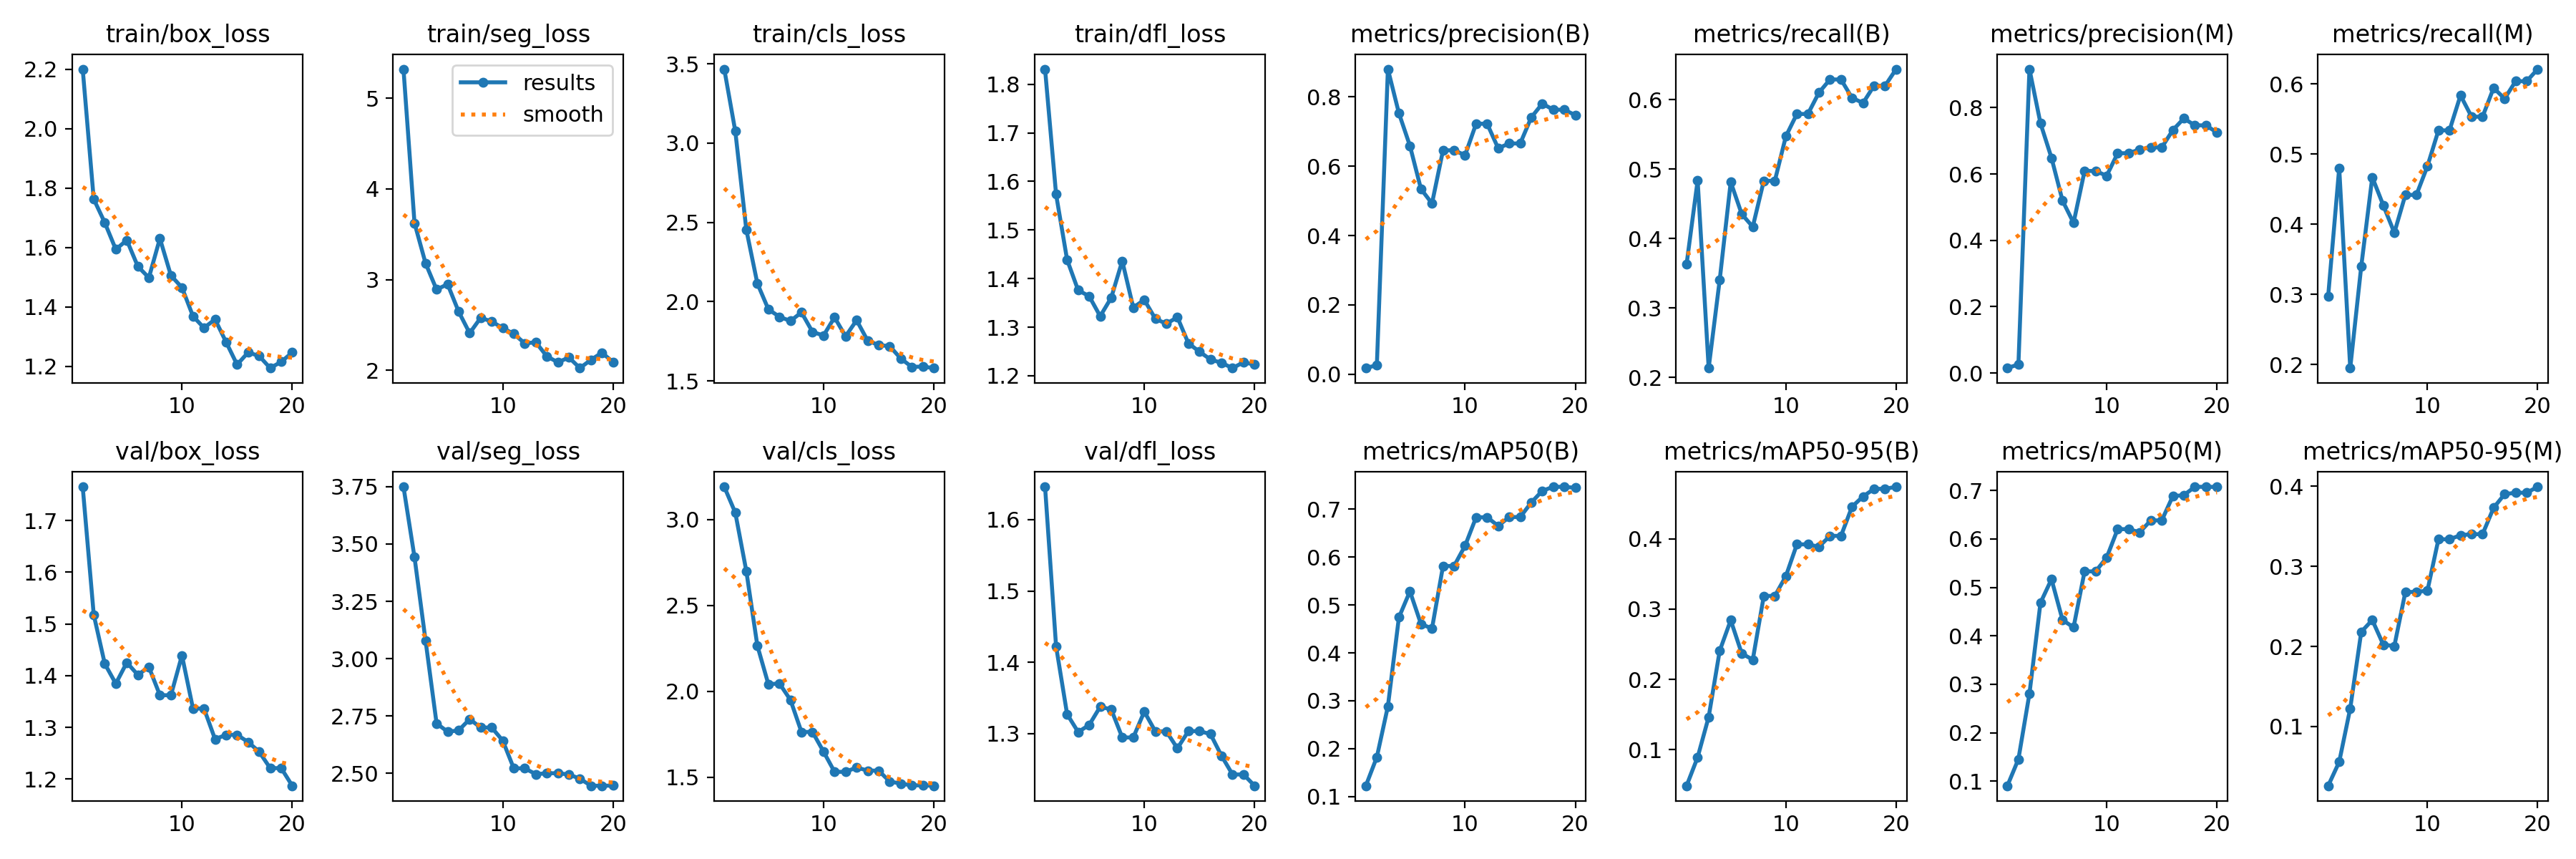

In [ ]:
Image("/content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-/results.png")

**CONFUSION MATRIX**

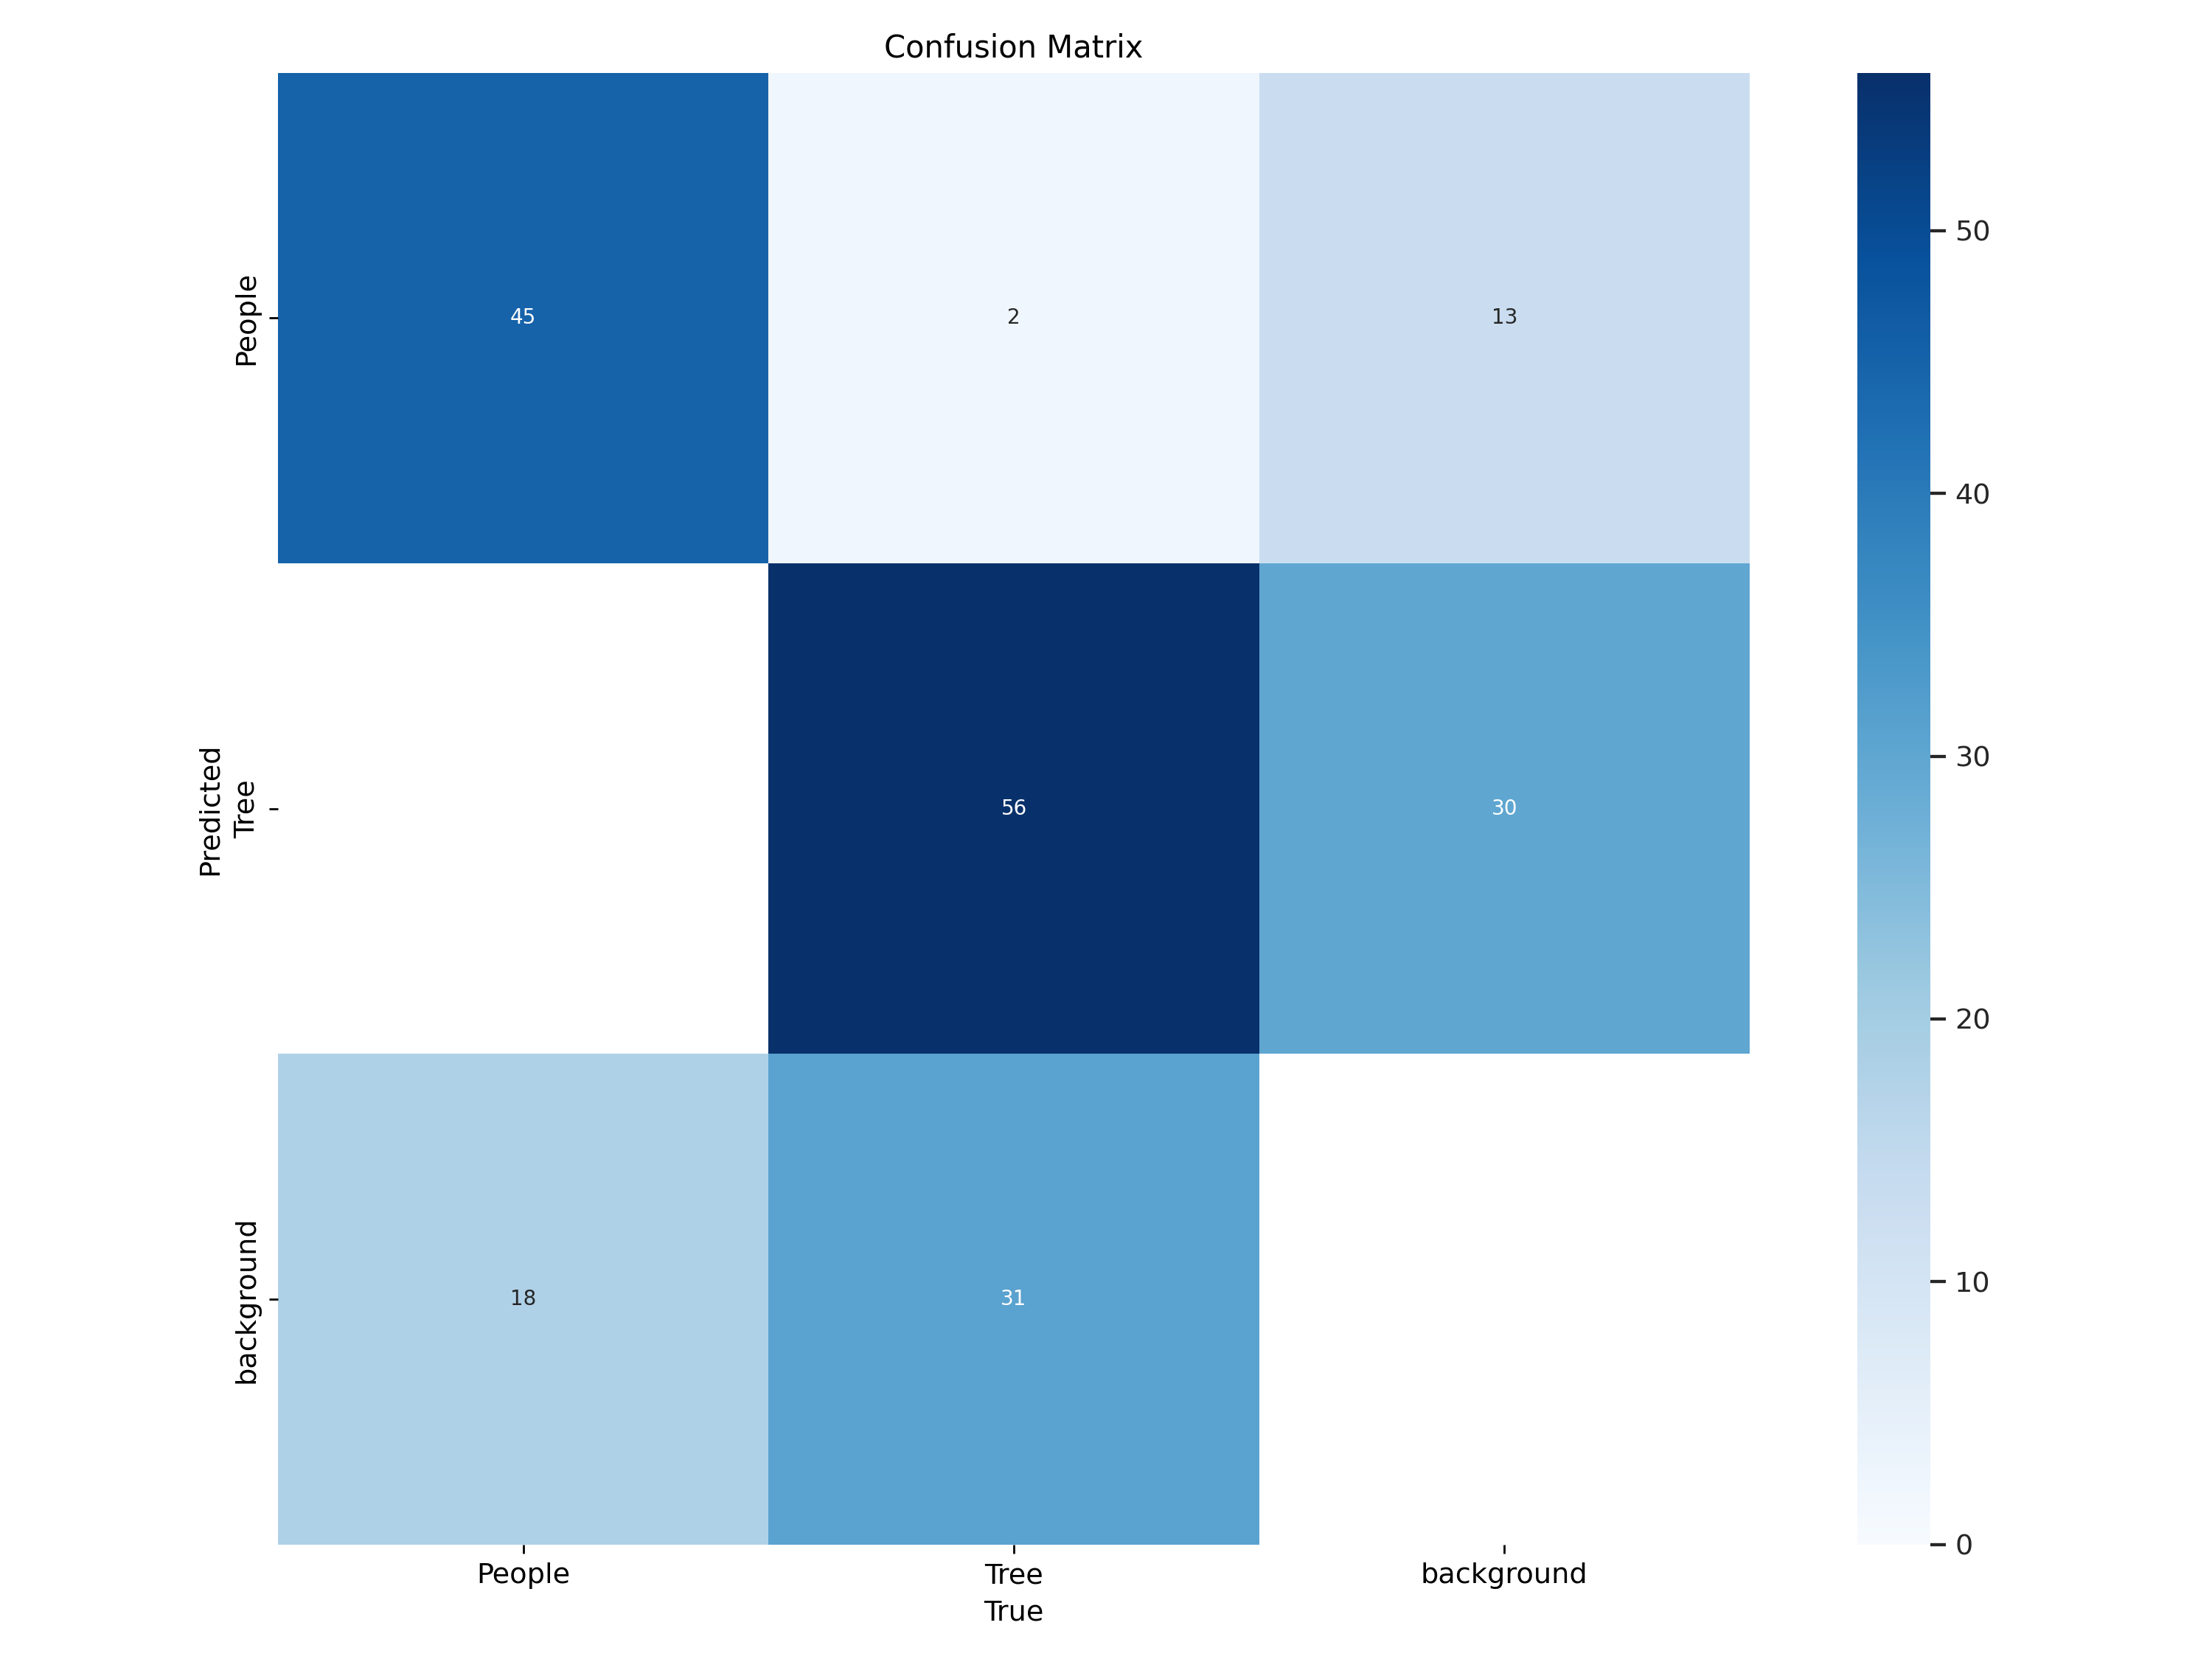

In [ ]:
Image(filename='/content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-/confusion_matrix.png', width=900)

**MODEL TESTING**

In [ ]:
# Setting up the best trained model as new model
my_new_model = YOLO('/content/drive/MyDrive/Tree_Project_New.v1i.yolov8/results/epochs-/weights/best.pt')

Testing on new unseen data


image 1/1 /125 image.png: 480x800 8 Peoples, 8 Trees, 84.1ms
Speed: 15.9ms preprocess, 84.1ms inference, 812.8ms postprocess per image at shape (1, 3, 480, 800)


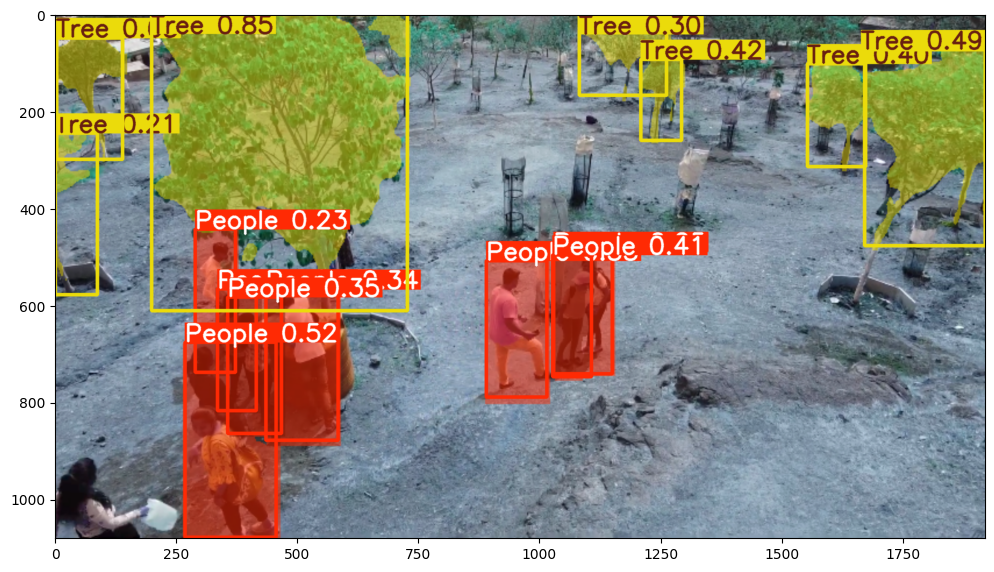

In [ ]:
new_image = '/125 image.png'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)


image 1/1 /672 image.png: 480x800 1 People, 7 Trees, 13.9ms
Speed: 4.9ms preprocess, 13.9ms inference, 4.7ms postprocess per image at shape (1, 3, 480, 800)


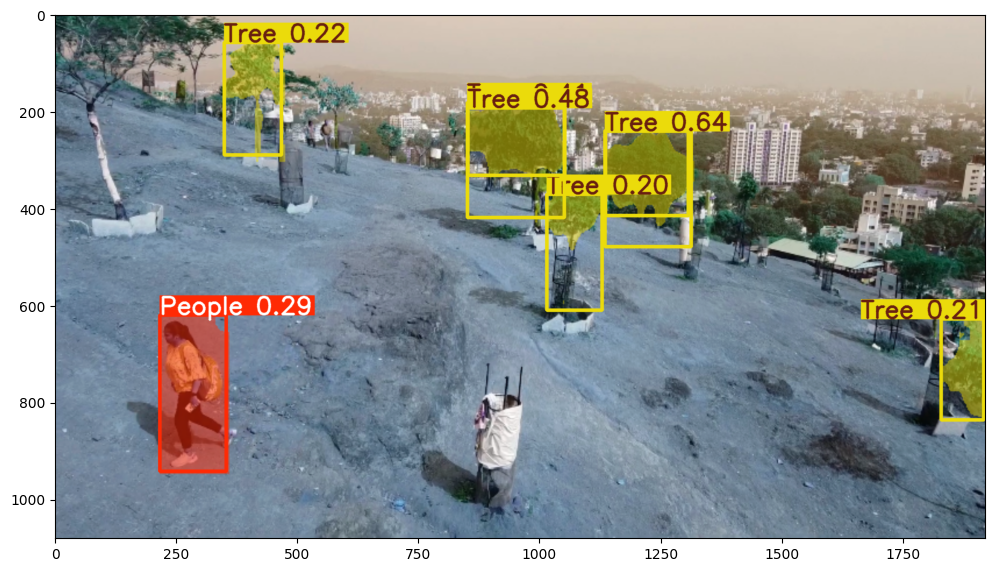

In [ ]:
new_image = '/672 image.png'
new_results = my_new_model.predict(new_image, conf=0.15)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)


image 1/1 /812 image.png: 480x800 13 Trees, 9.4ms
Speed: 3.2ms preprocess, 9.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


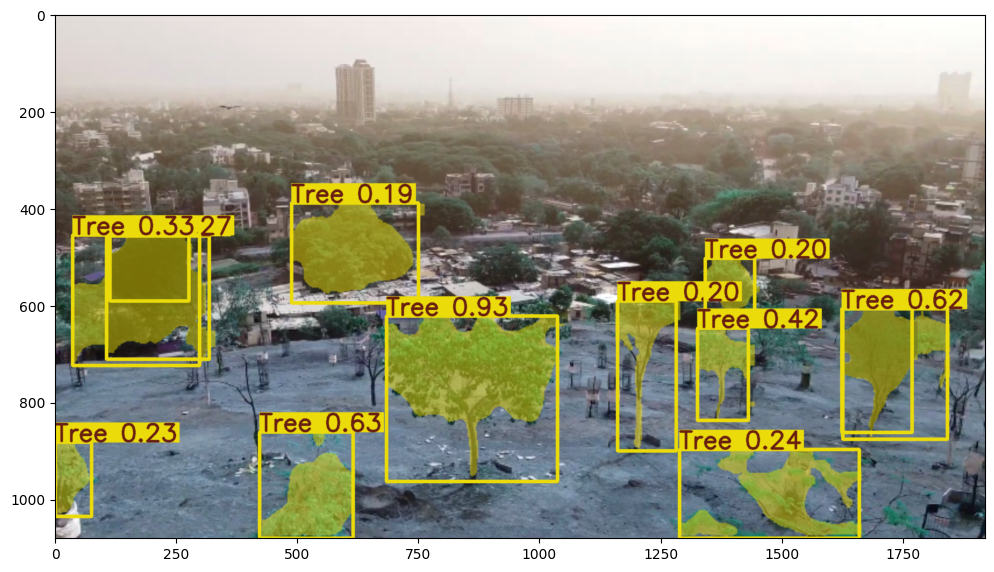

In [ ]:
new_image = '/812 image.png'
new_results = my_new_model.predict(new_image, conf=0.15)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)


image 1/1 /897 image.png: 480x800 12 Trees, 14.4ms
Speed: 4.8ms preprocess, 14.4ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 800)


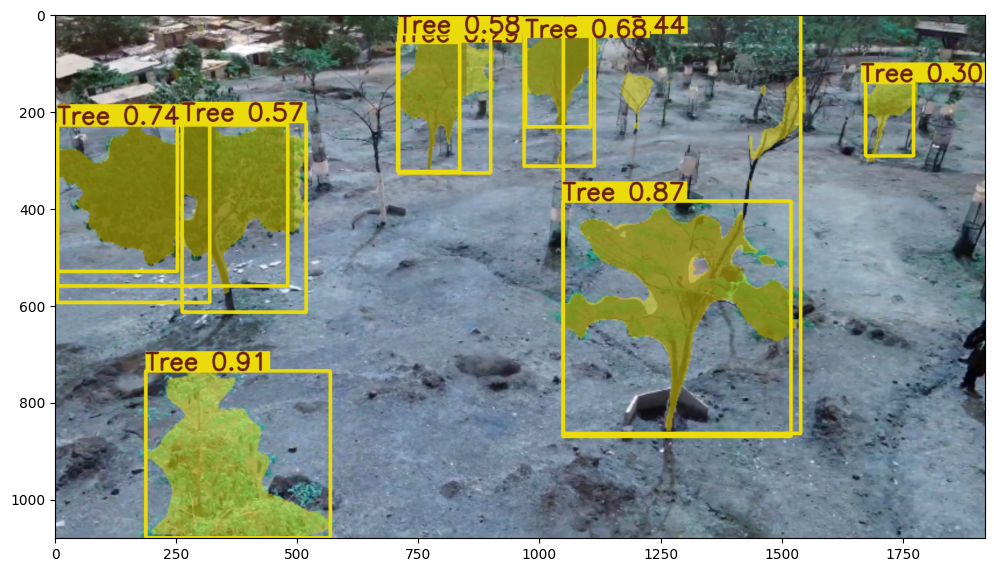

In [ ]:
new_image = '/897 image.png'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)


image 1/1 /952 image.png: 480x800 6 Peoples, 5 Trees, 9.3ms
Speed: 3.2ms preprocess, 9.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 800)


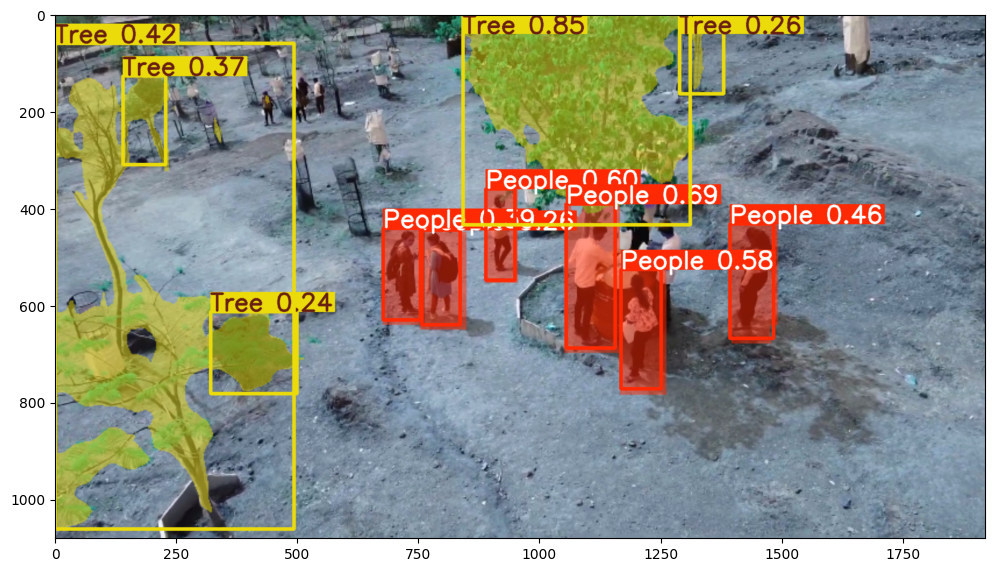

In [ ]:
new_image = '/952 image.png'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)


image 1/1 /4682 image.png: 480x800 10 Trees, 13.4ms
Speed: 4.7ms preprocess, 13.4ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 800)


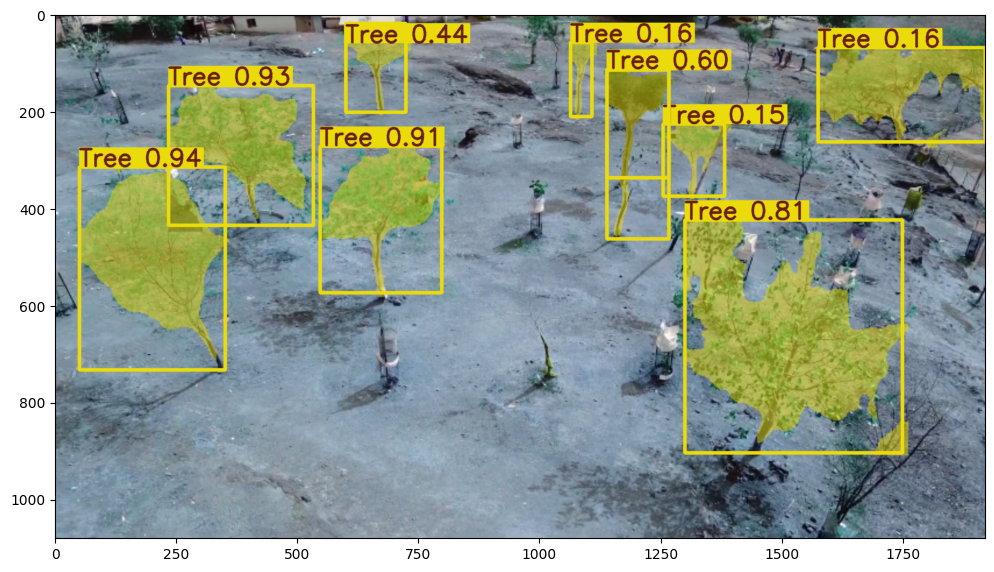

In [ ]:
new_image = '/4682 image.png'
new_results = my_new_model.predict(new_image, conf=0.15)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)


image 1/1 /4973 image.png: 480x800 5 Peoples, 3 Trees, 12.1ms
Speed: 4.5ms preprocess, 12.1ms inference, 24.3ms postprocess per image at shape (1, 3, 480, 800)


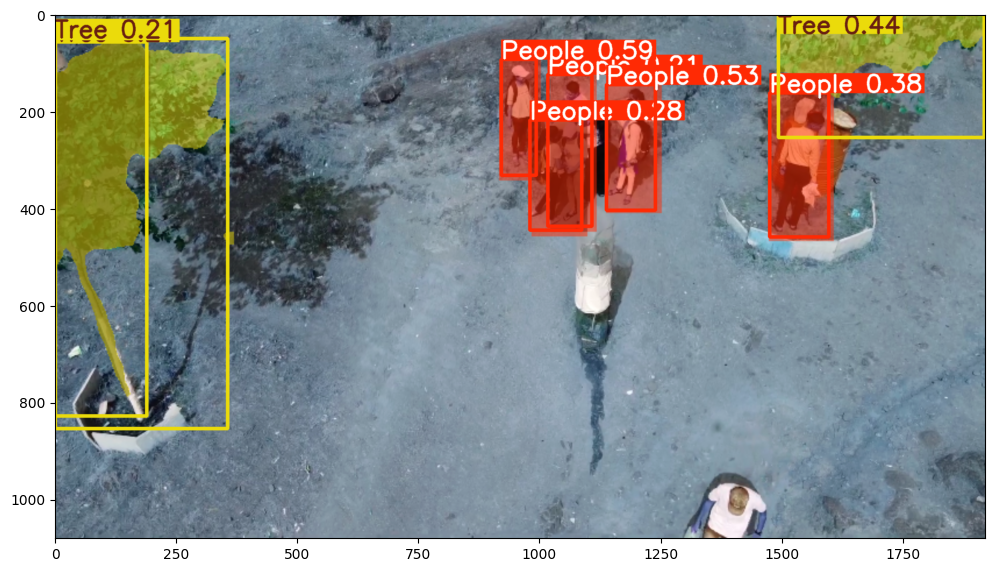

In [ ]:
new_image = '/4973 image.png'
new_results = my_new_model.predict(new_image, conf=0.2)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [ ]:
new_result = new_results[0]
extracted_masks = new_result.masks.data
extracted_masks.shape

torch.Size([8, 480, 800])

**EXTRACTING MASKS**

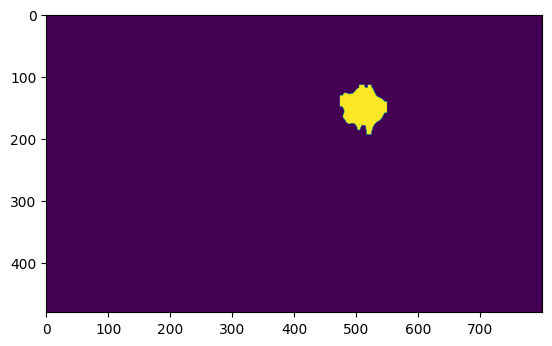

In [ ]:
masks_array = extracted_masks.cpu().numpy()
plt.imshow(masks_array[0])

In [ ]:
extracted_boxes = new_result.boxes.data
extracted_boxes.shape

torch.Size([8, 6])

In [ ]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

**COUNTING NUMBER OF TREES & PEOPLE**

In [ ]:
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")

Class Name: People, Number of Masks: 1
Class Name: Tree, Number of Masks: 7
